In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
dataset= pd.read_csv('train.csv', index_col="Id")
test= pd.read_csv('test.csv', index_col="Id")

In [3]:
dataset.isnull().sum()[dataset.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [4]:
dataset = dataset.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu', 'LotFrontage'], axis=1)
test = test.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu', 'LotFrontage'], axis=1)

In [5]:
dataset = dataset.apply(lambda x: x.fillna(x.value_counts().index[0]))
test = test.apply(lambda x: x.fillna(x.value_counts().index[0]))
#dataset = dataset.fillna("Unknown")
#test = test.fillna("Unknown")

In [6]:
dataset.fillna(dataset.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)
dataset.head()

C:\Users\Zach\AppData\Local\Temp/ipykernel_5388/2141093834.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)
C:\Users\Zach\AppData\Local\Temp/ipykernel_5388/2141093834.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(test.mean(), inplace=True)


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


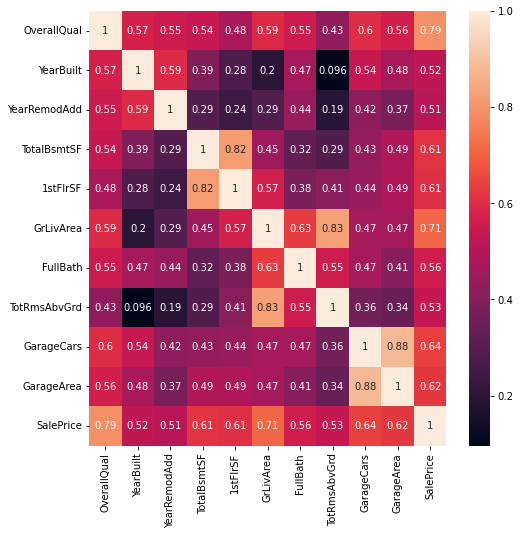

In [7]:
corr = dataset.corr()
rel_vars = corr.SalePrice[(corr.SalePrice > 0.5)]
rel_cols = list(rel_vars.index.values)

corr2 = dataset[rel_cols].corr()
plt.figure(figsize=(8,8))
hm = sns.heatmap(corr2, annot=True, annot_kws={'size':10})
plt.yticks(rotation=0, size=10)
plt.xticks(rotation=90, size=10)
plt.show()

In [8]:
X = dataset[rel_cols[:-1]].iloc[:,1:].values
y = dataset.iloc[:, -1].values

test = test[rel_cols[:-1]].iloc[:,1:].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [10]:
# Fit Random Forest on Training Set
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

# Score model
regressor.score(X_test, y_test)

0.7956378858500492

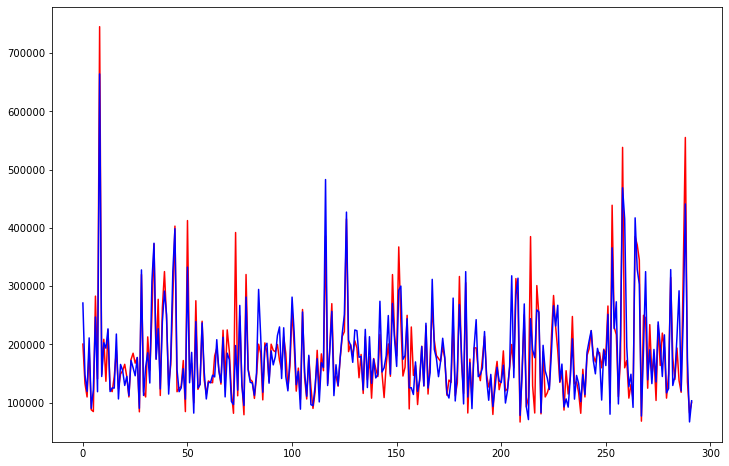

In [11]:
y_pred = regressor.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='red')
plt.plot(y_pred, color='blue')
plt.show()

In [12]:
metrics.mean_squared_log_error(y_pred, y_test)

0.03288808294184463

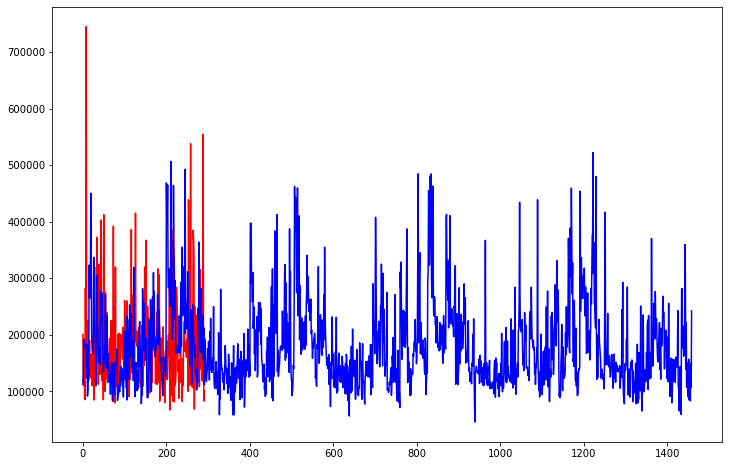

In [77]:
y_pred2 = regressor.predict(test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='red')
plt.plot(y_pred2, color='blue')
plt.show()

In [79]:
np.savetxt("submission.csv", y_pred2, delimiter = ",", fmt = '%f')